In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

In [3]:
HOUSING_PATH = os.path.join("datasets", "housing")

In [4]:
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    
 if not os.path.isdir(housing_path):
     os.makedirs(housing_path)
     
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "housing.csv")
 return pd.read_csv(csv_path)

In [4]:
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'

In [5]:
housing = pd.read_csv(url)

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The housing; "Ocean proximity" column looks like a categorical column, to find out how many categories it has :

In [10]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# visualization of the dataset

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

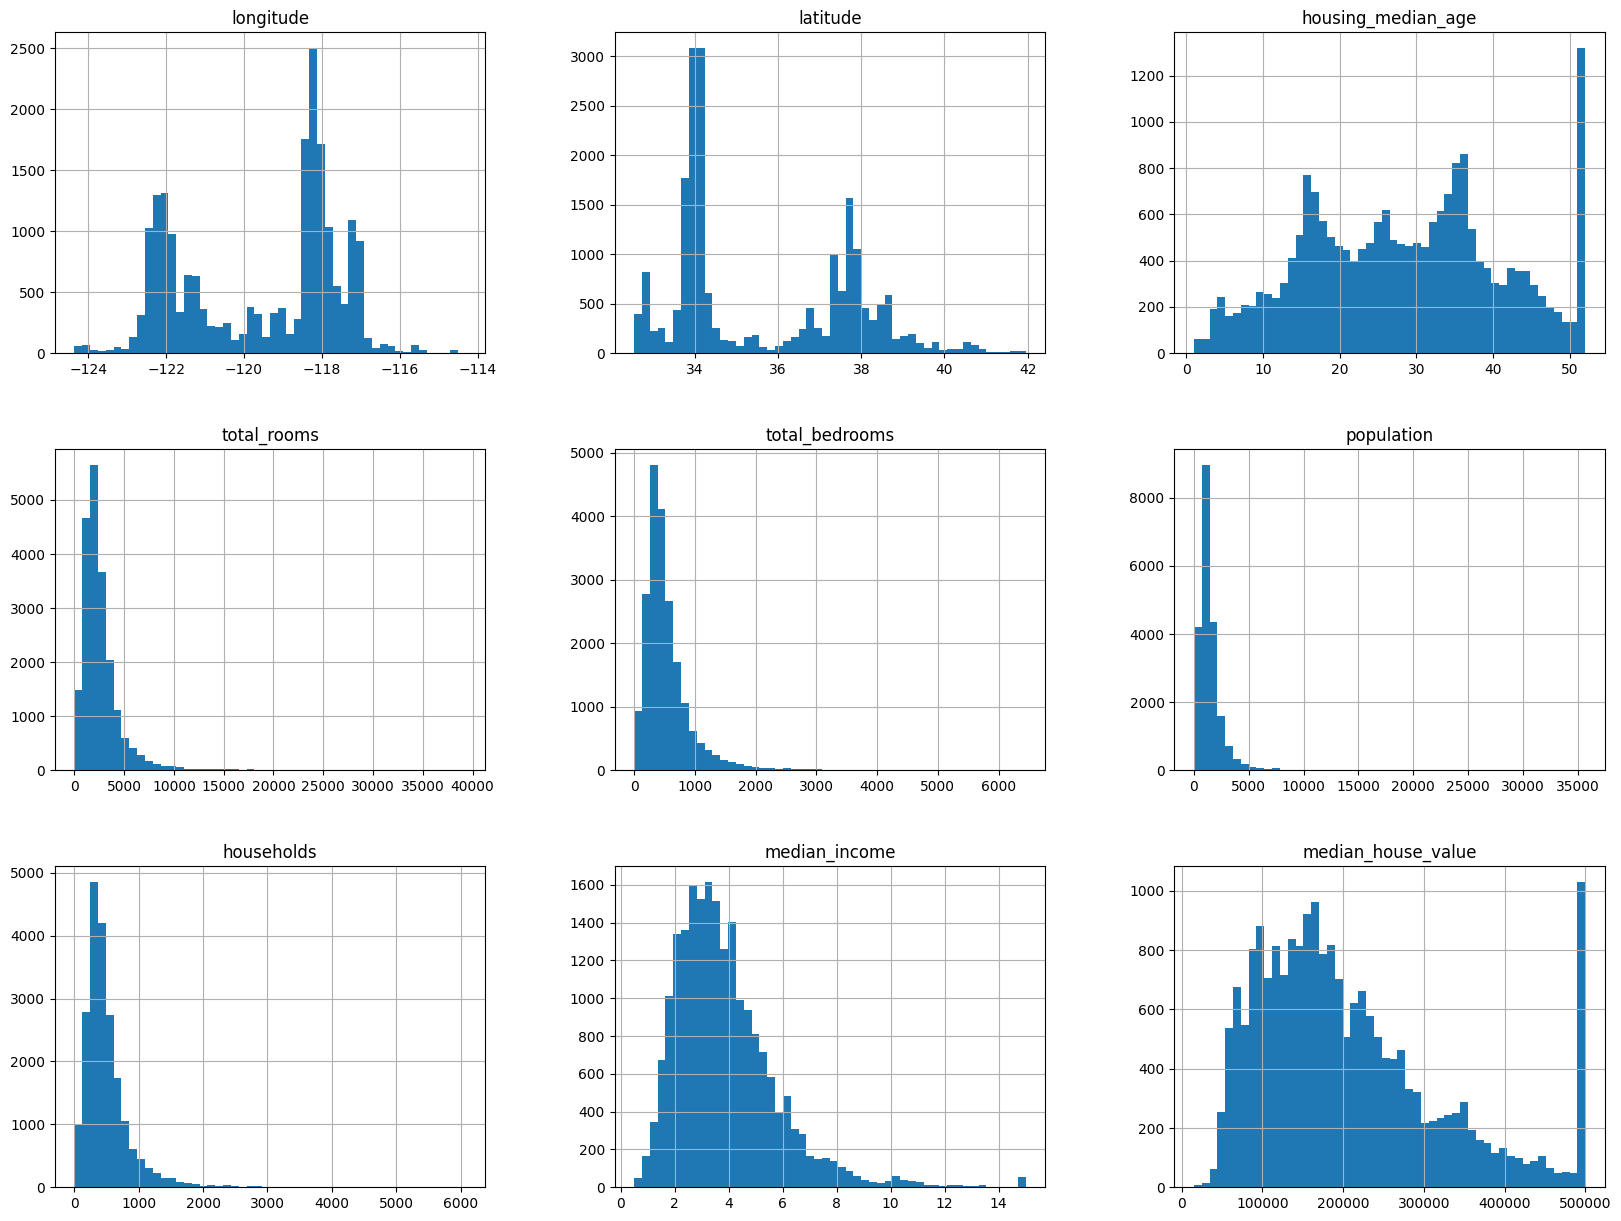

In [13]:
housing.hist(bins=50, figsize=(20,15))

<Axes: xlabel='median_income', ylabel='Count'>

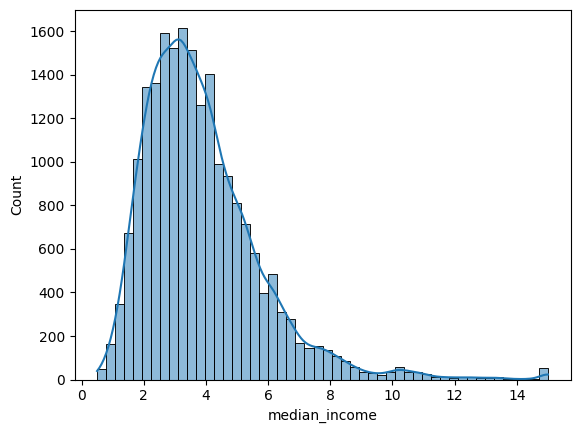

In [14]:
sns.histplot(housing['median_income'], bins=50,kde=True)       # histogram using seaborn 

In [15]:
#housing['median_income'].plot.hist(bins=50)         #  histogram using pandas built in data visualization

<Axes: xlabel='housing_median_age', ylabel='Count'>

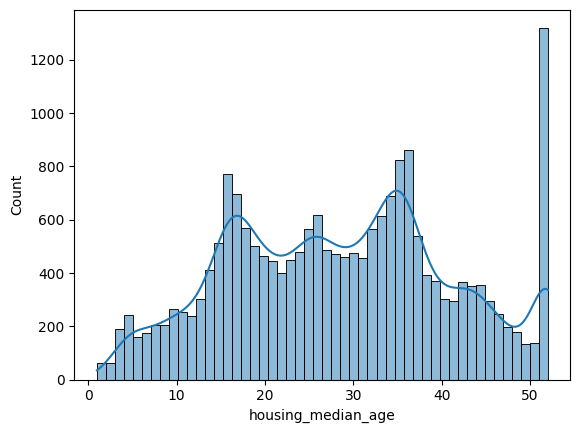

In [16]:
sns.histplot(housing['housing_median_age'], bins=50,kde=True) 

<Axes: xlabel='median_house_value', ylabel='Count'>

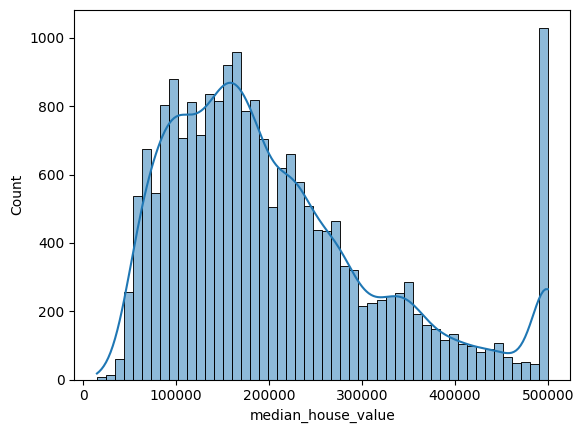

In [17]:
sns.histplot(housing['median_house_value'], bins=50,kde=True)     # this is our target attribute

# create test set

In [8]:
import numpy as np

In [19]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [20]:
train_set, test_set = split_train_test(housing, 0.2)
len(test_set)

4128

In [21]:
len(train_set) 

16512

use each instance’s identifier to decide whether or not it should go
in the test set (assuming instances have a unique and immutable identifier). 

In [11]:
from zlib import crc32

In [12]:
# function to check test set's identifier
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32  # lower or equal to 20% of the maximum hash value. add to test set

In [13]:
# function to split train/test
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set= ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [14]:
# using Row Index as a unique identifier

In [15]:
housing_with_id = housing.reset_index()   #adds an index column

In [16]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [29]:
# using latitude and longituted as unique identifier

In [30]:
#housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
#train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [31]:
# using scikit-learn

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [20]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [35]:
#creating an income category ; category 1 ranges from 0 to 1.5(less than $15000) and so on. up to 5 categories.

In [21]:
housing['income_cat'] = pd.cut(housing["median_income"],
                               bins=(0.,1.5,3.0,4.5,6.0, np.inf),labels=(1,2,3,4,5))

In [22]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<Axes: >

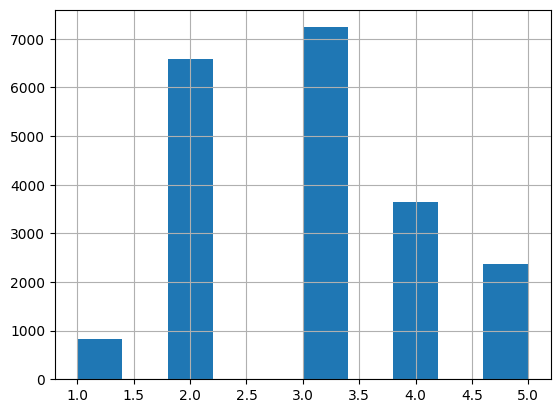

In [24]:
housing["income_cat"].hist()

In [26]:
housing["income_cat"].count()

20640

In [25]:
housing["median_income"].count()

20640

In [39]:
# Now we are ready to do stratified sampling based on  the income category column.

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit

In [41]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)

In [42]:
for train_index,test_index in split.split(housing, housing["income_cat"]):  #train index is the indices of train set.
    strat_train_set = housing.loc[train_index]                              # test index is the indices of test set
    strat_test_set = housing.loc[test_index]

In [43]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [44]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)  # Income category proportions in the stratified data set

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [45]:
housing["income_cat"].value_counts()/len(housing)  # income category proportion in the full data set

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

From above, you can see the proportions in the stratified data set and the one in full data set are almost the same

In [46]:
# now we remove the income_cat attribute so we get back to the original state:

In [47]:
for set_ in (strat_test_set,strat_train_set):
    set_.drop("income_cat", axis=1,inplace=True)

In [48]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


# Discover and visualizing Data to gain insight

In [49]:
housing = strat_train_set.copy()     # a copy to explore without harming the training set

<Axes: xlabel='longitude', ylabel='latitude'>

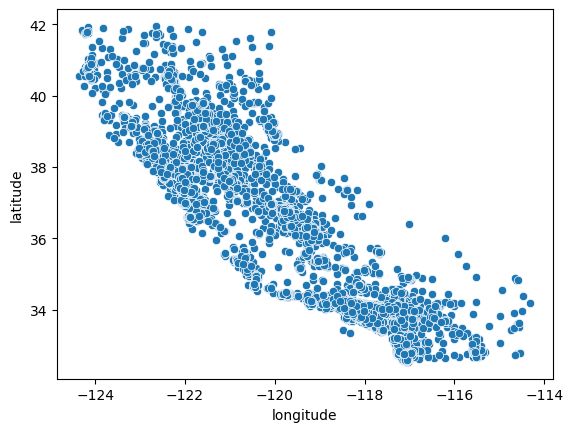

In [50]:
sns.scatterplot(housing,x='longitude',y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

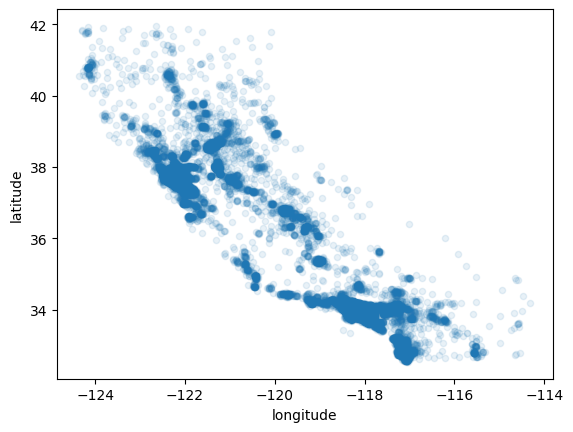

In [51]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1) #setting alpha=0.1 shows area with high density

Now lets look at the housing prices:

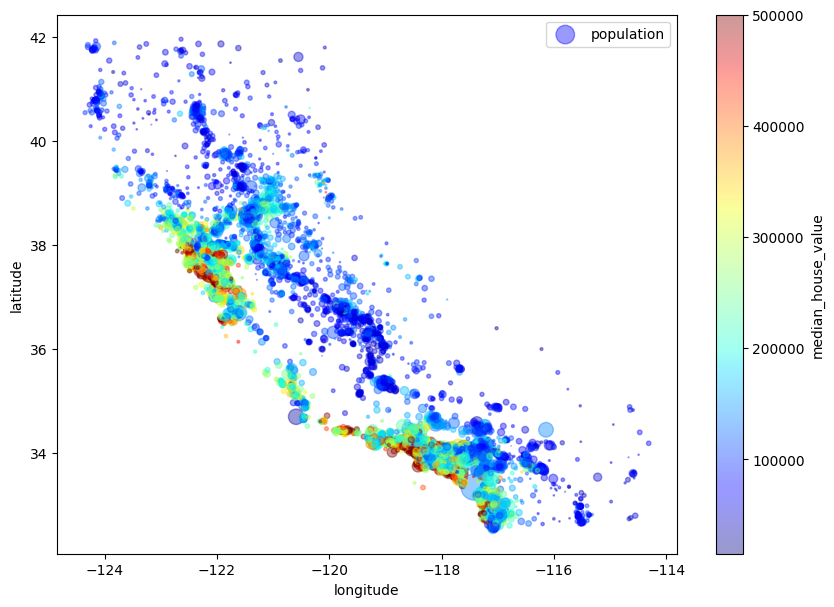

In [52]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=housing['population']/100,
            label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap('jet'),
            colorbar=True)
plt.legend()

In [53]:
# now lets look at the correlation:

In [54]:
corr_matrix = housing.drop('ocean_proximity',axis=1).corr()

In [55]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [56]:
# from above, there is a positive correlation between median house value and median income, and 
# the median house value tends to drop as you go up north and away from the ocean

In [57]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


<Axes: >

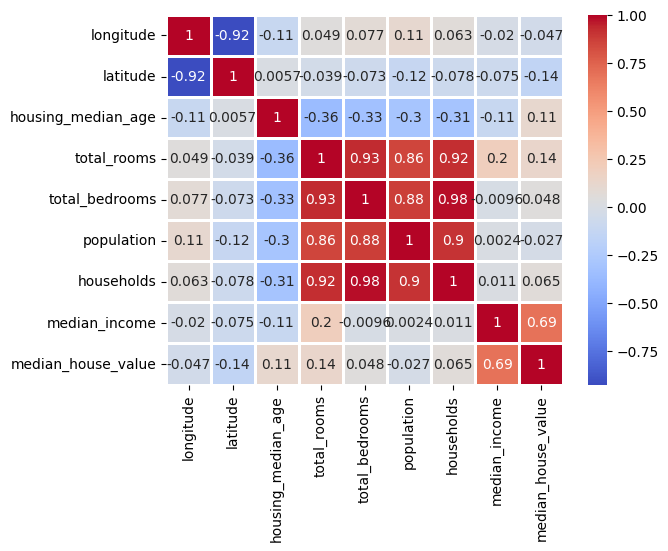

In [58]:
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linecolor='white',lw=1)

Let's use the pandas scatter_matrix function to also check correlation.

In [59]:
from pandas.plotting import scatter_matrix

In [60]:
attributes = ['median_house_value','median_income','housing_median_age','total_rooms']

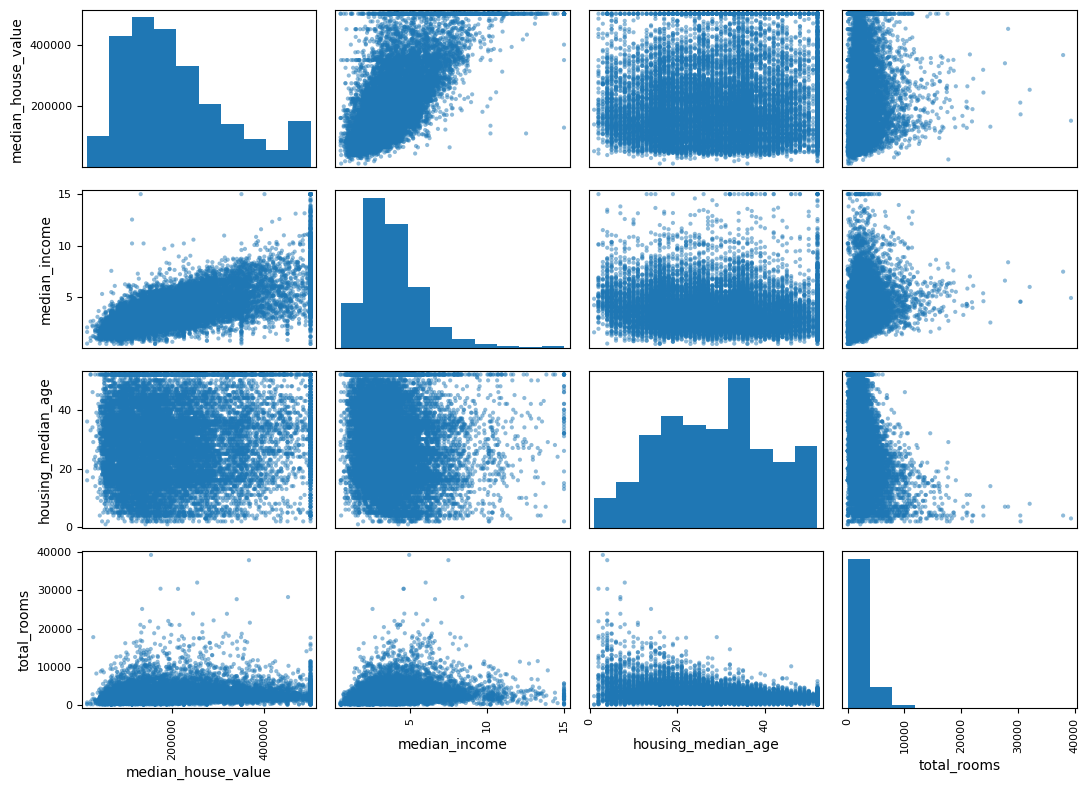

In [61]:
scatter_matrix(housing[attributes],figsize=(11,8))
plt.tight_layout()

In [62]:
# the most promising attribute showing more correlation to the median house value is the meidian income,lets explore 

<Axes: xlabel='median_income', ylabel='median_house_value'>

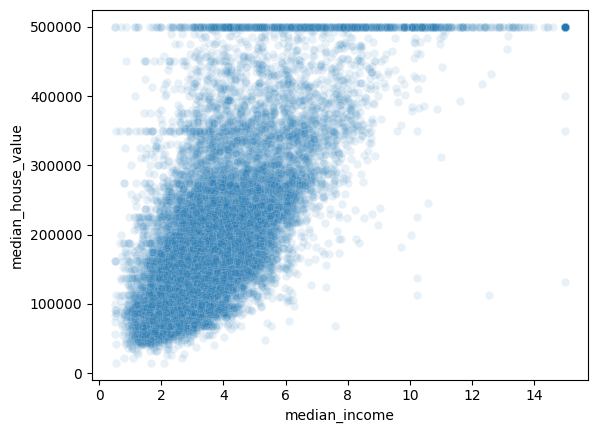

In [63]:
sns.scatterplot(housing, x='median_income',y='median_house_value',alpha=0.1)

In [64]:
#housing.plot(kind='scatter',x='median_income',y='median_house_value')

In [65]:
# Experimenting with attributtes combinations

In [66]:
housing["Rooms_per_household"] = housing["total_rooms"]/housing['households']
housing["Bedrooms_per_rooms"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["Population_per_household"] = housing["population"]/housing["households"]

In [67]:
# now let's look at their correlation

In [68]:
corr_matrix = housing.drop('ocean_proximity',axis=1).corr()

In [69]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
Rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
Population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
Bedrooms_per_rooms         -0.259952
Name: median_house_value, dtype: float64

<Axes: xlabel='Bedrooms_per_rooms', ylabel='median_house_value'>

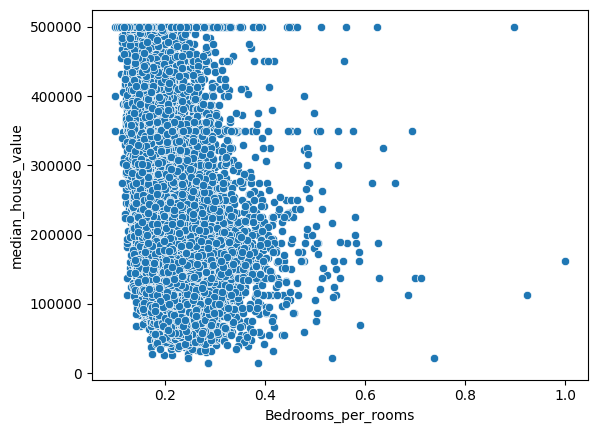

In [70]:
sns.scatterplot(housing,x='Bedrooms_per_rooms',y='median_house_value')

from above, it is apparent that the lower the bedroom/room ratio, the more expensive the house is. i.e Bedrooms_per_rooms

# Preparing Data for Machine-Learning algorithm

Lets revert to a clean training set by creating another copy, and then separate predictors and labels 

In [71]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [72]:
# Data Cleaning

total bedroom has some missing values, lets fix this

In [73]:
#we will use the scikit-learn Class; SimpleImputer

In [74]:
from sklearn.impute import SimpleImputer

In [75]:
imputer = SimpleImputer(strategy="median")

In [76]:
housing_num = housing.drop("ocean_proximity",axis=1)  # remove the text attribute to allow for median to be computed

In [77]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [78]:
imputer.statistics_                # returns the array of stored statistics

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [79]:
housing_num.median().values           # same as above

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Now we use this trained imputer to transform the training set by replacing missing values by the learned medians

In [80]:
X = imputer.transform(housing_num)

 above is a numpy array containing transformed features, to take it back to DataFrame:

In [81]:
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [82]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [83]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [84]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [85]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


# handling text and categorical attributes

In [86]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [87]:
housing_cat.nunique()

ocean_proximity    5
dtype: int64

Let's convert the above categories form text to numbers

In [88]:
from sklearn.preprocessing import OrdinalEncoder

In [89]:
ordinal_encoder = OrdinalEncoder()

In [90]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [91]:
housing_cat_encoded[:20]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [4.],
       [0.],
       [0.],
       [0.],
       [3.],
       [0.]])

The downside of this is that the ML algorithm will assume nearby values are more similar than two distant values.
To solve this is to create one binary attribute per category (1's and 0's)

In [92]:
from sklearn.preprocessing import OneHotEncoder

In [93]:
cat_encoder = OneHotEncoder()

In [94]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [95]:
housing_cat_1hot      # returns a Scipy sparse matrix as an output.

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [96]:
housing_cat_1hot.toarray()     #converting it to a (dense) Numpy array:

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [97]:
cat_encoder.categories_     # returns the list of the categories using the encoder's instance variable

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# custom transformers

In [98]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND


here is a small transformer class that adds the combine attributes we discussed earlier:

In [99]:
from sklearn.base import BaseEstimator, TransformerMixin

In [100]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:,rooms_ix] / X[:,households_ix]
        population_per_household = X[:,population_ix] / X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

In [101]:
attr_adder = CombineAttributesAdder(add_bedrooms_per_room= False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [102]:
housing.values

array([[-121.46, 38.52, 29.0, ..., 706.0, 2.1736, 'INLAND'],
       [-117.23, 33.09, 7.0, ..., 768.0, 6.3373, 'NEAR OCEAN'],
       [-119.04, 35.37, 44.0, ..., 300.0, 2.875, 'INLAND'],
       ...,
       [-122.72, 38.44, 48.0, ..., 172.0, 3.1797, '<1H OCEAN'],
       [-122.7, 38.31, 14.0, ..., 501.0, 4.1964, '<1H OCEAN'],
       [-122.14, 39.97, 27.0, ..., 197.0, 3.1319, 'INLAND']], dtype=object)

In [103]:
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

# feature scaling

Most ML algorith don not perform well when the input numerical attributes have very different scales

The total number of rooms ranges from about 6 to 39,320, while the median
incomes only range from 0 to 15

# transformation pipelines

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [105]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
     ('attribs_adder', CombineAttributesAdder()),
     ('sdt_scaler', StandardScaler()),
      ])

In [106]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [107]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

it would be more convenient to have a single transformer to handle all columns, both numerical and categorical:

In [108]:
from sklearn.compose import ColumnTransformer

In [109]:
num_attribs = list(housing_num)
cat_atrribs = ["ocean_proximity"]

In [110]:
#housing_num

In [214]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [215]:
full_pipline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_atrribs),
])

In [216]:
housing_prepared = full_pipline.fit_transform(housing)

In [217]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [218]:
housing.iloc[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


# select and train a model

 let us start with linear regression

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
lin_reg = LinearRegression()

In [118]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

now let's check it out on some few instances:

In [119]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipline.transform(some_data)

In [120]:
print("predictions: ", lin_reg.predict(some_data_prepared))

predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [121]:
print("Labels: ", list(some_labels))

Labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


it works but the predictions are not exactly accurate,let's measure this using regression model's RMSE on the whole training set

In [122]:
from sklearn.metrics import mean_squared_error

In [123]:
housing_predictions = lin_reg.predict(housing_prepared)

In [124]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [125]:
lin_rmse = np.sqrt(lin_mse)

In [126]:
lin_rmse

68627.87390018745

most district median_housing_value ranges 120000 to 265000. so a prediction error of $68,600 is not reallly good. so this model has underfits the training set. let's try a more complex model; Decision Tree

In [127]:
from sklearn.tree import DecisionTreeRegressor

In [128]:
tree_reg = DecisionTreeRegressor()

In [129]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

Lets evaluate it on a training set:

In [130]:
housing_predictions = tree_reg.predict(housing_prepared)

In [131]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)

In [132]:
tree_rmse = np.sqrt(tree_mse)

In [133]:
tree_rmse

0.0

This is way to good, the model has clearly overfits the training set.

we are still not using the test set. this is because until we have a model we are confindent about, we will keep testing on the training set.

# Better evaluation using cross-validation

In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)

In [136]:
tree_rmse_scores = np.sqrt(-scores)

In [137]:
# function to display the scores:

In [138]:
def display_scores(scores):
    print("scores: ", scores)
    print('Mean: ', scores.mean())
    print("Standard deviation: ", scores.std())

In [139]:
display_scores(tree_rmse_scores)

scores:  [71818.99130302 70203.43159209 68959.47798996 71453.39367729
 70303.89964423 76421.34753213 71230.38947855 73716.84200338
 70121.08935564 71877.09469822]
Mean:  71610.59572745097
Standard deviation:  2019.850143999451


The decision tree is nowhere as good as it's earlier perfomance(zero estimation error), and even perform worst than the Linear Regression model. Decision Tree has a score of approximately 71398, and generally 2671.

Let us get the scores for the linear regression just to be sure:

In [140]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)

In [141]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [147]:
display_scores(lin_rmse_scores)

scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard deviation:  2880.3282098180666


the linear regression has a score of approximately 69104, generally + or - 2880. thus we are right, the Decision tree is overfitting so badly that it performs worst than the Linear Regression model.

NOW let us try another model now, random forest regressor:

In [148]:
from sklearn.ensemble import RandomForestRegressor

In [144]:
forest_reg = RandomForestRegressor()

In [149]:
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [150]:
housing_predictions = forest_reg.predict(housing_prepared)

In [151]:
housing_predictions

array([ 75014., 291703.,  87143., ..., 158745., 247050.,  69519.])

In [152]:
forest_mse = mean_squared_error(housing_labels,housing_predictions)

In [153]:
forest_rmse = np.sqrt(forest_mse)

In [154]:
forest_rmse

18705.908684254162

In [155]:
# lets check it cross validation:

In [156]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error",cv=10)

In [157]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [158]:
display_scores(forest_rmse_scores)

scores:  [51851.83181108 49247.72962153 46726.42942799 52263.9945311
 47468.93583107 51918.45423957 52179.85012399 49499.00009398
 48802.93951579 53754.93265444]
Mean:  50371.40978505339
Standard deviation:  2215.3926972199156


This is much better: Ramdon forest looks promising. But the scores on the training set is much lower than that of the validaation set, i.e the model is still overfitting the training set. 

# savning our models using joblib

Lets first save our models using the sklearn.external.joblib

In [159]:
import joblib as jb

In [160]:
#my_models = [lin_reg,tree_reg,forest_reg]

In [161]:
#Ejb.dump(my_models, "my_models.pkl")         #saving my models

In [162]:
#my_models_loaded = jb.load("my_models.pkl")

In [163]:
#jb.dump(lin_reg, "lin_reg_joblib")

In [164]:
#Emy_models_loaded[2].predict(housing_prepared)

#  Fine Tuning my Model

In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
param_grid = [{
    'n_estimators': [10,30,35], 'max_features': [4,6,8,10]},                 #-->>> bootstrap here is True; the default.
    {'bootstrap': [False], 'n_estimators':[3,10], 'max_features':[2,3,4]}]

In [167]:
forest_reg = RandomForestRegressor()

In [168]:
#grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error', return_train_score=True)

In [169]:
#grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [4, 6, 8, 10],
                          'n_estimators': [10, 30, 35]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

# saving random forest model

In [251]:
forest_model = forest_reg

In [252]:
jb.dump(forest_model, 'forest_model.pkl')

['forest_model.pkl']

In [253]:
forest_model_loaded = jb.load('forest_model.pkl')

In [170]:
grid_search.best_params_                       # returns the best combination of parameter.

{'max_features': 6, 'n_estimators': 35}

Notice 8 and 30 are the maximum values that were evaluated, we should probably search again with higher values as the score may continues to improve.

--->> now we have another 6 and 30
and we have a better one, 6 and 35

In [171]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=35)

In [172]:
# to see the evaluation score:

In [173]:
grid_search.cv_results_

{'mean_fit_time': array([0.62577705, 1.87549067, 2.23992686, 0.87513471, 2.69604592,
        3.11723137, 1.16578097, 5.41778812, 4.44612536, 1.6124651 ,
        5.46281114, 5.54169064, 0.18874407, 0.65404019, 0.28492093,
        0.84097915, 0.29638596, 1.10582247]),
 'std_fit_time': array([0.02055502, 0.09246292, 0.20676866, 0.01678158, 0.07250202,
        0.03713753, 0.02760423, 0.63938003, 0.14991439, 0.16153273,
        0.6346765 , 0.4495476 , 0.01458933, 0.00658844, 0.01109308,
        0.06961873, 0.02826352, 0.01614171]),
 'mean_score_time': array([0.01199269, 0.03354497, 0.03448505, 0.00938134, 0.03150773,
        0.03295102, 0.01563163, 0.03690176, 0.03750105, 0.01786256,
        0.04151983, 0.03818994, 0.00099983, 0.01493444, 0.00724382,
        0.00937657, 0.00625033, 0.01122303]),
 'std_score_time': array([6.61654221e-03, 2.80541336e-03, 8.81682857e-03, 7.65983706e-03,
        5.12720382e-04, 2.80225637e-03, 9.58596877e-06, 6.64277514e-03,
        7.65457771e-03, 4.46844106e-

In [174]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

52883.7426617542 {'max_features': 4, 'n_estimators': 10}
50553.013529052856 {'max_features': 4, 'n_estimators': 30}
50308.857708138756 {'max_features': 4, 'n_estimators': 35}
51846.573144522554 {'max_features': 6, 'n_estimators': 10}
49893.21038894499 {'max_features': 6, 'n_estimators': 30}
49780.87253765708 {'max_features': 6, 'n_estimators': 35}
52557.45483893047 {'max_features': 8, 'n_estimators': 10}
50065.10628112697 {'max_features': 8, 'n_estimators': 30}
49935.33240366788 {'max_features': 8, 'n_estimators': 35}
52373.59515684285 {'max_features': 10, 'n_estimators': 10}
50366.23398940175 {'max_features': 10, 'n_estimators': 30}
50361.3376664359 {'max_features': 10, 'n_estimators': 35}
62042.86220769126 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54209.869202296606 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59730.460411937114 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52614.30293386313 {'bootstrap': False, 'max_features': 3, 'n_estim

In [175]:
 # our best score at 6 and 35 is RMSE = 49777. its better than the one i got = 50337 using default hyperparamter. we have got our best model so far

# analyze the best models and their errors

In [176]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [177]:
feature_importances

array([7.45818178e-02, 6.78631566e-02, 4.53559040e-02, 1.84152941e-02,
       1.64027858e-02, 1.74582644e-02, 1.65306149e-02, 3.36353449e-01,
       6.10938056e-02, 1.07125334e-01, 7.31924114e-02, 1.04934815e-02,
       1.45989564e-01, 6.45040443e-05, 3.96559105e-03, 5.11402105e-03])

In [178]:
#Let’s display these importance scores next to their corresponding attribute names:

In [179]:
extra_attribs = ['rooms_per_hhold','pop_per_hhold','bedrooms_per_room']

In [180]:
cat_encoder = full_pipline.named_transformers_['cat']

In [181]:
cat_one_hot_attribs = list(cat_encoder.categories_[0])

In [182]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [183]:
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [184]:
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [185]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3363534494314994, 'median_income'),
 (0.14598956412233088, 'INLAND'),
 (0.10712533416502525, 'pop_per_hhold'),
 (0.07458181782593956, 'longitude'),
 (0.07319241143199057, 'bedrooms_per_room'),
 (0.06786315661475312, 'latitude'),
 (0.06109380556132041, 'rooms_per_hhold'),
 (0.04535590397901402, 'housing_median_age'),
 (0.01841529413983364, 'total_rooms'),
 (0.017458264399358395, 'population'),
 (0.01653061486999438, 'households'),
 (0.01640278584531318, 'total_bedrooms'),
 (0.010493481466962745, '<1H OCEAN'),
 (0.005114021051240482, 'NEAR OCEAN'),
 (0.003965591051096385, 'NEAR BAY'),
 (6.450404432755658e-05, 'ISLAND')]

# Evaluate your system on the test set

In [186]:
final_model = grid_search.best_estimator_

In [187]:
X_test = strat_test_set.drop('median_house_value', axis=1)

In [188]:
y_test = strat_test_set['median_house_value'].copy()

In [189]:
X_test_prepared = full_pipline.transform(X_test)  # you don't want to fit the test set

In [190]:
final_predictions = final_model.predict(X_test_prepared)

In [191]:
final_mse = mean_squared_error(y_test, final_predictions)

In [192]:
final_rmse = np.sqrt(final_mse)

In [193]:
final_rmse

47726.22856918741

In [194]:
# we perform the confidence interval for the generalization error 

In [195]:
from scipy import stats

In [196]:
confidence = 0.95

In [197]:
sqaured_errors = (final_predictions - y_test) ** 2

In [198]:
np.sqrt(stats.t.interval(confidence, len(sqaured_errors) - 1,
                        loc=sqaured_errors.mean(),
                        scale=stats.sem(sqaured_errors)))

array([45754.45485676, 49619.71027362])

In [194]:
# lets try using SVM

In [195]:
from sklearn.svm import SVR

In [196]:
svr_model = SVR()

In [197]:
#svr_model.fit(housing_prepared, housing_labels)

SVR()

In [198]:
housing_svr_pred = svr_model.predict(housing_prepared)

In [199]:
svr_mse = mean_squared_error(housing_labels,housing_svr_pred)

In [200]:
svr_rmse = np.sqrt(svr_mse)

In [201]:
svr_rmse

118578.69234925653

In [202]:
from sklearn.model_selection import GridSearchCV

In [204]:
param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},]

In [205]:
grid = GridSearchCV(svr_model,param_grid,cv=5,scoring='neg_mean_squared_error', verbose=2)

In [206]:
#grid.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=  10.4s
[CV] END ..............................C=10.0, kernel=linear; total time=  11.5s
[CV] END ..............................C=10.0, kernel=linear; total time=  12.1s
[CV] END ..............................C=10.0, kernel=linear; total time=  12.3s
[CV] END ..............................C=10.0, kernel=linear; total time=  13.4s
[CV] END ..............................C=30.0, kernel=linear; total time=  12.8s
[CV] END ..............................C=30.0, kernel=linear; total time=  12.1s
[CV] END ..............................C=30.0, kernel=linear; total time=  12.1s
[CV] END ..............................C=30.0, kernel=linear; total time=  12.1s
[CV] END ..............................C=30.0, kernel=linear; total time=  12.7s
[CV] END .............................C=100.0, kernel=linear; total time=  13.0s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [207]:
grid.best_params_

{'C': 30000.0, 'kernel': 'linear'}

In [208]:
grid.best_estimator_

SVR(C=30000.0, kernel='linear')

In [212]:
neg_mse = grid.best_score_

In [214]:
rmse = np.sqrt(-neg_mse)

In [215]:
rmse

70286.61835383571

Above score(70286) for SVR is worst than that of Random Forest. 

In [217]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

In [225]:
param_dist = {'kernel': ['linear','rbf'],
             'C': reciprocal(20, 200000),
             'gamma': expon(scale=1.0),
            }

In [226]:
svm_reg = SVR()

In [227]:
rand_search = RandomizedSearchCV(svm_reg, param_distributions=param_dist,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)

In [228]:
#rand_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=  10.7s
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=  11.6s
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=  13.3s
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=  17.3s
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=  12.7s
[CV] END C=26290.20646430022, gamma=0.9084469696321253, kernel=rbf; total time=  24.2s
[CV] END C=26290.20646430022, gamma=0.9084469696321253, kernel=rbf; total time=  23.0s
[CV] END C=26290.20646430022, gamma=0.9084469696321253, kernel=rbf; total time=  25.7s
[CV] END C=26290.20646430022, gamma=0.9084469696321253, kernel=rbf; total time=  26.2s
[CV] END C=26290.20646430022, gamma=0.9084469696321253, kernel=rbf; total time=  26.1s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021899583DA0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000218BE361670>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [229]:
rand_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

In [230]:
negative_mse = rand_search.best_score_

In [231]:
Rmse = np.sqrt(-negative_mse)

In [232]:
Rmse

54751.69009488048

Now this is much closer to the RandomFOrest than GridsearchCV, although not there yet.

In [190]:
# adding a transformer in the preparation pipeline to select only the most important attributtes

In [200]:
# below explains the function(indices_of_k_) that follows:

In [201]:
x = [10,1,6,8,2,12,20,15,56,23]

In [202]:
idx = np.argpartition(x, kth=-3)

In [205]:
np.sort(idx)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [203]:
print(idx)

[1 4 2 3 0 5 7 6 9 8]


In [206]:
print(np.sort(idx[-3:]))

[6 8 9]


In [230]:
from sklearn.base import BaseEstimator, TransformerMixin

In [268]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

let's define the number of features we want to keep

In [269]:
k = 5

Now, let's look for the indices of the top k features:

In [270]:
top_k_feature_indices = indices_of_top_k_(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  9, 10, 12], dtype=int64)

In [271]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'pop_per_hhold', 'bedrooms_per_room',
       'INLAND'], dtype='<U18')

let's double check that these are indeed top k features:

In [272]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.3363534494314994, 'median_income'),
 (0.14598956412233088, 'INLAND'),
 (0.10712533416502525, 'pop_per_hhold'),
 (0.07458181782593956, 'longitude'),
 (0.07319241143199057, 'bedrooms_per_room')]

Looking good... Now let's create a new pipeline that runs the previously defined preparation pipeline, and adds top k feature selection:

In [273]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))])

In [274]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

Now let's look at the features of the first three instances

In [275]:
housing_prepared_top_k_features[0:3]

array([[-0.94135046, -0.8936472 ,  0.00622264, -0.12112176,  1.        ],
       [ 1.17178212,  1.292168  , -0.04081077, -0.81086696,  0.        ],
       [ 0.26758118, -0.52543365, -0.07537122, -0.33827252,  1.        ]])

Now let's double check that these are indeed the top k features:

In [276]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046, -0.8936472 ,  0.00622264, -0.12112176,  1.        ],
       [ 1.17178212,  1.292168  , -0.04081077, -0.81086696,  0.        ],
       [ 0.26758118, -0.52543365, -0.07537122, -0.33827252,  1.        ]])

# 4

In [277]:
# creating a single pipeline that does the full data preparation plus the final prediction

In [278]:
prepare_select_and_predict_pipline = Pipeline([
    ('preparation', full_pipline),
    ('feature_selection',TopFeatureSelector(feature_importances, k)),
    ('forest_reg', RandomForestRegressor(**grid_search.best_params_) )
])

In [279]:
prepare_select_and_predict_pipline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombineAttributesAdder()),
                                                                  ('sdt_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder()...
                 TopFeatureSelector(feature_importances=array([7.45818178e-02, 6.78631566e-02, 4.53559040e-02, 1.84152941e-02,
       1.64027858e-02, 1.74582644e-02, 1.65306149e-02, 3.36353449e-01,
       6.10938056e-02, 1.07125334e-01, 7.31924114e-02, 1.04934815e-02,
       1.45989564e-01, 6.45040443e-05, 3.96559105e-03, 5.11402105e-03]),
                                    k=5)),
                ('forest_reg',
                 RandomForestRegressor(max_features=6, n_estimators=35))])

In [280]:
# lets try the full pipeline on few instances

In [281]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]
print("predictions:\t", prepare_select_and_predict_pipline.predict(some_data))
print("Labels:\t\t", list(some_labels))

predictions:	 [ 72917.14285714 295237.14285714  90474.28571429 122594.28571429]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]


# saving the full pipeline model using joblib

In [254]:
complete_pipline = prepare_select_and_predict_pipline

In [256]:
#pipeline_model = jb.dump(prepare_select_and_predict_pipline, 'complete_pipeline_model.pkl')

In [257]:
complete_pipline_model = jb.load('complete_pipeline_model.pkl')